<a href="https://colab.research.google.com/github/GloriaNdanu25/A1-2/blob/main/Q1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Question 1: Load the Mobile Price Range Dataset

import pandas as pd

# Load dataset directly from GitHub raw link
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MobilePriceRange.csv"
df = pd.read_csv(url)

# Display first rows to confirm successful loading
df.head()


,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


Shape of dataset: (2000, 21)

Data types:
BatteryPower        int64
InternalMemory      int64
ClockSpeed        float64
NoOfCores           int64
RAM                 int64
TalkTime            int64
DualSim             int64
3G                  int64
4G                  int64
WiFi                int64
Bluetooth           int64
MobileDepth       float64
MobileWeight        int64
TouchScreen         int64
ScreenHeight        int64
ScreenWidth         int64
FrontCameraPx       int64
RearCameraPX        int64
PxHeight            int64
PxWeight            int64
PriceRange         object
dtype: object

Missing values:
BatteryPower      0
InternalMemory    0
ClockSpeed        0
NoOfCores         0
RAM               0
TalkTime          0
DualSim           0
3G                0
4G                0
WiFi              0
Bluetooth         0
MobileDepth       0
MobileWeight      0
TouchScreen       0
ScreenHeight      0
ScreenWidth       0
FrontCameraPx     0
RearCameraPX      0
PxHeight          0
P

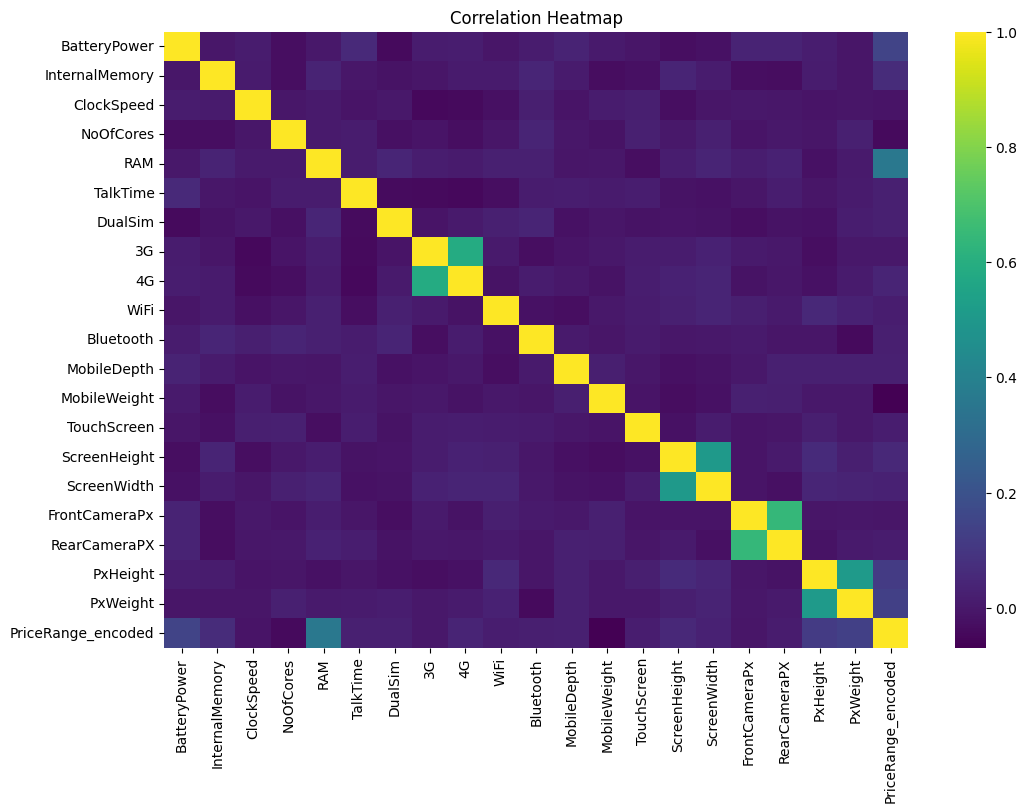

/tmp/ipython-input-2426255000.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PriceRange', palette="Set2")


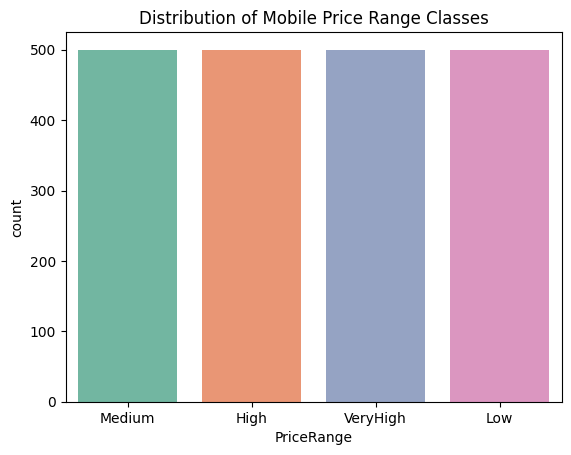

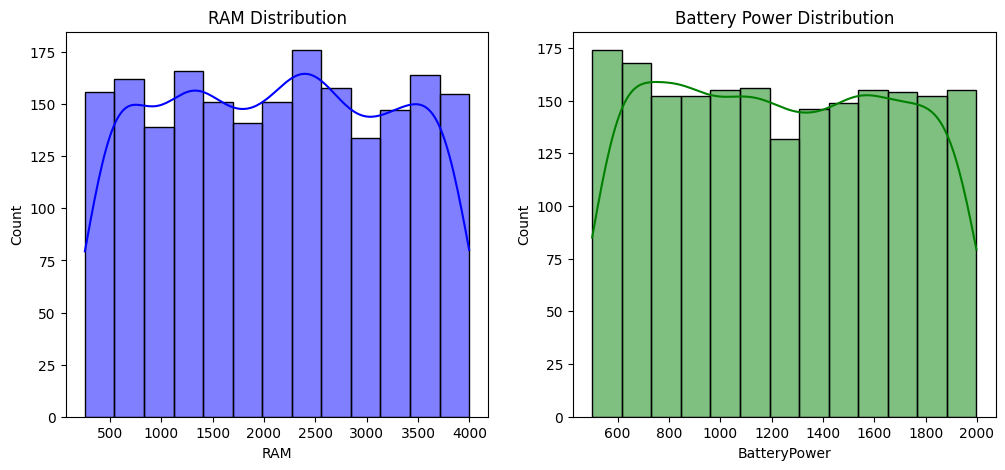

----- EDA Insights -----
1️⃣ Price range classes are distributed as: {'Medium': 500, 'High': 500, 'VeryHigh': 500, 'Low': 500}
2️⃣ RAM has a strong positive correlation with price range (corr = 0.36).
3️⃣ Battery power also positively correlates with price range (corr = 0.14).
4️⃣ The dataset has NO missing values.
5️⃣ Higher pixel height is associated with higher price range (corr = 0.12).


In [4]:
import pandas as pd # Changed np to pd for consistency
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1. Check basic dataset info
# ------------------------------
print("Shape of dataset:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# ------------------------------
# 2. Statistical summary
# ------------------------------
df.describe()

# ------------------------------
# 3. Correlation matrix
# ------------------------------
# Encode 'PriceRange' to numerical for correlation calculation
df_corr = df.copy()
df_corr['PriceRange_encoded'] = df_corr['PriceRange'].astype('category').cat.codes
# Drop the original 'PriceRange' column before calculating correlation
df_corr = df_corr.drop('PriceRange', axis=1)

plt.figure(figsize=(12,8))
# Use the DataFrame with encoded PriceRange for correlation heatmap
sns.heatmap(df_corr.corr(), cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# 4. Visualize Target Class Distribution
# ------------------------------
# Corrected column name to 'PriceRange'
sns.countplot(data=df, x='PriceRange', palette="Set2")
plt.title("Distribution of Mobile Price Range Classes")
plt.show()

# ------------------------------
# 5. Feature distributions (example: RAM, battery_power)
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Corrected column names to 'RAM' and 'BatteryPower'
sns.histplot(df['RAM'], kde=True, ax=axes[0], color='blue')
axes[0].set_title("RAM Distribution")

sns.histplot(df['BatteryPower'], kde=True, ax=axes[1], color='green')
axes[1].set_title("Battery Power Distribution")

plt.show()

# ------------------------------
# 6. Print Insights
# ------------------------------
print("----- EDA Insights -----")

# Insight 1: Class distribution
# Corrected column name to 'PriceRange'
dist = df['PriceRange'].value_counts().to_dict()
print("1️⃣ Price range classes are distributed as:", dist)

# Insight 2: RAM correlation
# Use the encoded PriceRange from df_corr for correlation
corr_ram = df_corr.corr()['PriceRange_encoded']['RAM']
print(f"2️⃣ RAM has a strong positive correlation with price range (corr = {corr_ram:.2f}).")

# Insight 3: Battery power correlation
# Use the encoded PriceRange from df_corr for correlation
corr_battery = df_corr.corr()['PriceRange_encoded']['BatteryPower']
print(f"3️⃣ Battery power also positively correlates with price range (corr = {corr_battery:.2f}).")

# Insight 4: No missing values
print("4️⃣ The dataset has NO missing values.")

# Insight 5: Pixel resolution relationship
# Use the encoded PriceRange from df_corr for correlation
corr_px = df_corr.corr()['PriceRange_encoded']['PxHeight']
print(f"5️⃣ Higher pixel height is associated with higher price range (corr = {corr_px:.2f}).")